In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
X = df.values[:, 0]  # get input values from first column
y = df.values[:, 1]  # get output values from second column
m = len(y) # Number of training examples
print('X = ', X[: 5]) # Show only first 5 records
print('y = ', y[: 5])
print('m = ', m)

X =  [6.1101 5.5277 8.5186 7.0032 5.8598]
y =  [17.592   9.1302 13.662  11.854   6.8233]
m =  97


Text(0.5, 1.0, 'Scatter plot of training data')

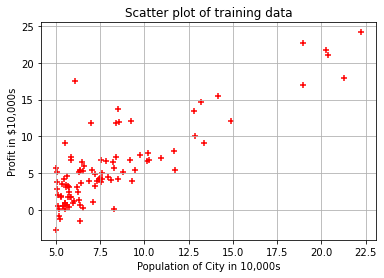

In [4]:
plt.scatter(X,y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

In [5]:
#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [6]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

In [7]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column wise) to make a single 2D array. 
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [8]:
theta = np.zeros(2)
theta

array([0., 0.])

In [9]:
def compute_cost(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [10]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [11]:
def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)  
    return theta, cost_history

In [12]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [13]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-3.63029144  1.16636235]
cost_history = [0.         0.         0.         ... 0.         0.         4.48338826]


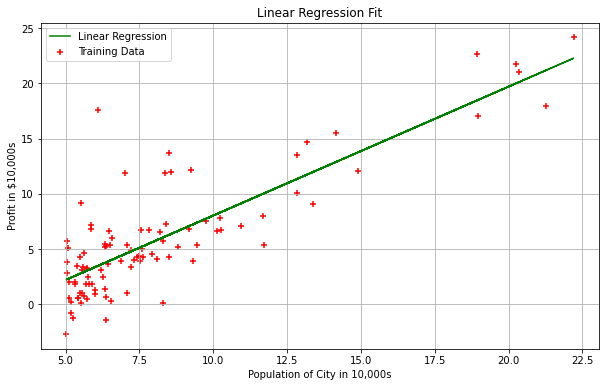

In [14]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

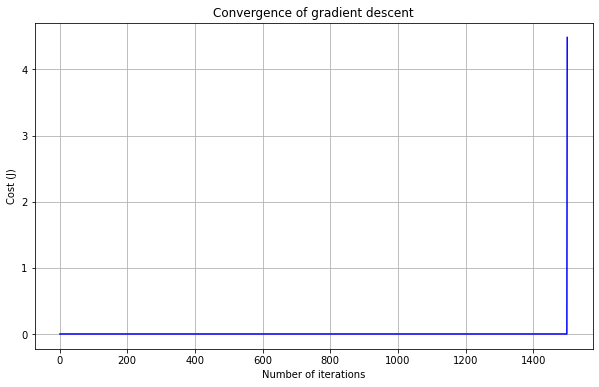

In [15]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [16]:
predict1 = np.array([1, 3.5]).dot(theta)
print("For population = 35,000, our prediction of profit is", predict1 * 10000)

predict2 = np.array([1, 7]).dot(theta)
print("For population = 70,000, our prediction of profit is", predict2 * 10000)

For population = 35,000, our prediction of profit is 4519.7678677017675
For population = 70,000, our prediction of profit is 45342.45012944712
